In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

%matploblib notebook

Using TensorFlow backend.
ERROR:root:Line magic function `%matploblib` not found.


In [7]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [2]:
# Preprocess the data

(images_train, _), (images_test, _) = mnist.load_data()
images_train = images_train.astype('float32') / 255
x_train = images_train.reshape((len(images_train), np.prod(images_train.shape[1:])))

images_test = images_test.astype('float32') / 255
x_test = images_test.reshape((len(images_test), np.prod(images_test.shape[1:])))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
# Train the model
autoencoder.fit(
    x_train, x_train, 
    epochs=50, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test)
)

decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s - loss: 0.3494 - val_loss: 0.2629
Epoch 2/50
60000/60000 [==============================] - 8s - loss: 0.2571 - val_loss: 0.2500
Epoch 3/50
60000/60000 [==============================] - 7s - loss: 0.2419 - val_loss: 0.2348
Epoch 4/50
60000/60000 [==============================] - 8s - loss: 0.2256 - val_loss: 0.2138
Epoch 5/50
60000/60000 [==============================] - 8s - loss: 0.2079 - val_loss: 0.2020
Epoch 6/50
60000/60000 [==============================] - 8s - loss: 0.1996 - val_loss: 0.1954
Epoch 7/50
60000/60000 [==============================] - 7s - loss: 0.1928 - val_loss: 0.1867
Epoch 8/50
60000/60000 [==============================] - 7s - loss: 0.1853 - val_loss: 0.1820
Epoch 9/50
60000/60000 [==============================] - 7s - loss: 0.1799 - val_loss: 0.1758
Epoch 10/50
60000/60000 [==============================] - 8s - loss: 0.1734 - val_loss: 0.1675

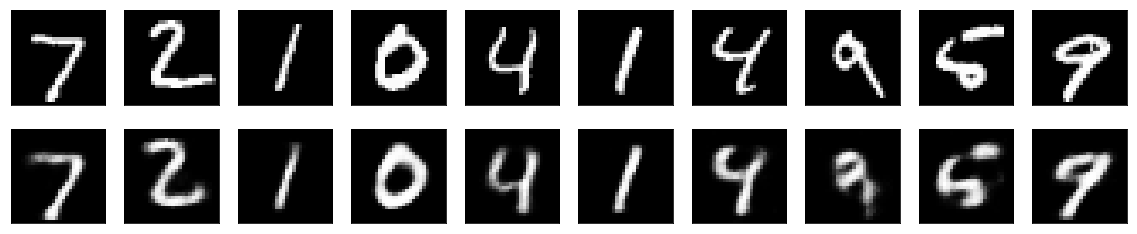

In [9]:
# Visualize the model

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()